In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics

In [2]:
font_size_plot = 22
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot
plt.rcParams['axes.formatter.useoffset'] = False

path = os.path.abspath('')
os.chdir(f'{path}')

pathlib.Path(f'results').mkdir(parents=True,exist_ok=True)

mean (of seeds) standard deviation (of orders) for each method and meta model

normal prediction std

In [3]:
normal_prediction_dataframe = pd.read_csv('std data\\stdnormalpredictiondataframe.csv')
unique_method_list = normal_prediction_dataframe['METHOD'].unique().tolist()
unique_meta_list = normal_prediction_dataframe['META'].unique().tolist()
normal_prediction_std_dataframe = pd.DataFrame()
for unique_method in unique_method_list:
    for unique_meta in unique_meta_list:
        interested_dataframe = normal_prediction_dataframe[(normal_prediction_dataframe['METHOD']==unique_method)&(normal_prediction_dataframe['META']==unique_meta)]
        interested_dataframe_not_std = interested_dataframe[['SEED','METHOD','META']]
        interested_dataframe_std = interested_dataframe.drop(['SEED','METHOD','META'],axis='columns')
        interested_dataframe_std = interested_dataframe_std.mean()
        mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
        mean_std_dataframe['METHOD'] = unique_method
        mean_std_dataframe['META'] = unique_meta
        normal_prediction_std_dataframe = pd.concat([mean_std_dataframe,normal_prediction_std_dataframe],axis='rows')
normal_prediction_std_dataframe = normal_prediction_std_dataframe.reset_index(drop=True)
# rearrange columns
for item in ['META','METHOD']:
    normal_prediction_std_dataframe_pop = normal_prediction_std_dataframe.pop(item)
    normal_prediction_std_dataframe.insert(column=item,value=normal_prediction_std_dataframe_pop,loc=0)
normal_prediction_std_dataframe = normal_prediction_std_dataframe.rename(dict(MAE='MEAN STD MAE',MSE='MEAN STD MSE',RMSE='MEAN STD RMSE',R2='MEAN STD R2',MAPE='MEAN STD MAPE'),axis='columns')
print(normal_prediction_std_dataframe.to_string())
normal_prediction_std_dataframe.to_csv('results\\std normal prediction results.csv',index=False)

        METHOD META  MEAN STD MAE  MEAN STD MSE  MEAN STD RMSE   MEAN STD R2  MEAN STD MAPE
0     Handcode   DT  1.029162e-01  1.481674e+01   8.830214e-02  1.775127e-03   8.593842e-03
1     Handcode  KNN  4.670163e-15  9.963015e-14   4.670163e-15  3.648565e-17   7.297130e-17
2     Handcode  LIN  6.191333e-15  5.947246e-13   7.683848e-15  8.660163e-17   2.322302e-16
3       Scikit   DT  1.029162e-01  1.481674e+01   8.830214e-02  1.775127e-03   8.593842e-03
4       Scikit  KNN  4.670163e-15  9.963015e-14   4.670163e-15  3.648565e-17   7.297130e-17
5       Scikit  LIN  4.248864e-15  5.252453e-13   6.447472e-15  8.322787e-17   2.609355e-16
6    Ascending   DT  3.113442e-15  1.992603e-13   0.000000e+00  1.216188e-17   7.297130e-17
7    Ascending  KNN  4.670163e-15  9.963015e-14   4.670163e-15  3.648565e-17   7.297130e-17
8    Ascending  LIN  1.556721e-15  2.988905e-13   0.000000e+00  1.216188e-17   7.297130e-17
9   Descending   DT  3.113442e-15  0.000000e+00   3.113442e-15  1.216188e-17   6

normal prediction mean

In [4]:
normal_prediction_dataframe = pd.read_csv('mean data\\meannormalpredictiondataframe.csv')
unique_method_list = normal_prediction_dataframe['METHOD'].unique().tolist()
unique_meta_list = normal_prediction_dataframe['META'].unique().tolist()
normal_prediction_mean_dataframe = pd.DataFrame()
for unique_method in unique_method_list:
    for unique_meta in unique_meta_list:
        interested_dataframe = normal_prediction_dataframe[(normal_prediction_dataframe['METHOD']==unique_method)&(normal_prediction_dataframe['META']==unique_meta)]
        interested_dataframe_not_mean = interested_dataframe[['SEED','METHOD','META']]
        interested_dataframe_mean = interested_dataframe.drop(['SEED','METHOD','META'],axis='columns')
        interested_dataframe_mean = interested_dataframe_mean.mean()
        mean_mean_dataframe = interested_dataframe_mean.to_frame().transpose()
        mean_mean_dataframe['METHOD'] = unique_method
        mean_mean_dataframe['META'] = unique_meta
        normal_prediction_mean_dataframe = pd.concat([mean_mean_dataframe,normal_prediction_mean_dataframe],axis='rows')
normal_prediction_mean_dataframe = normal_prediction_mean_dataframe.reset_index(drop=True)
# rearrange columns
for item in ['META','METHOD']:
    normal_prediction_mean_dataframe_pop = normal_prediction_mean_dataframe.pop(item)
    normal_prediction_mean_dataframe.insert(column=item,value=normal_prediction_mean_dataframe_pop,loc=0)
normal_prediction_mean_dataframe = normal_prediction_mean_dataframe.rename(dict(MAE='MEAN MEAN MAE',MSE='MEAN MEAN MSE',RMSE='MEAN MEAN RMSE',R2='MEAN MEAN R2',MAPE='MEAN MEAN MAPE'),axis='columns')
print(normal_prediction_mean_dataframe.to_string())
normal_prediction_mean_dataframe.to_csv('results\\mean normal prediction results.csv',index=False)

        METHOD META  MEAN MEAN MAE  MEAN MEAN MSE  MEAN MEAN RMSE  MEAN MEAN R2  MEAN MEAN MAPE
0     Handcode   DT      54.351329    6418.248883       79.846460      0.160334        0.548764
1     Handcode  KNN      40.933284    3752.723430       60.907557      0.513418        0.643969
2     Handcode  LIN      37.923875    3404.676749       58.004133      0.558676        0.675824
3       Scikit   DT      54.351329    6418.248883       79.846460      0.160334        0.548764
4       Scikit  KNN      40.933284    3752.723430       60.907557      0.513418        0.643969
5       Scikit  LIN      37.923875    3404.676749       58.004133      0.558676        0.675824
6    Ascending   DT      54.451485    6432.665529       79.932799      0.158589        0.555548
7    Ascending  KNN      40.933284    3752.723430       60.907557      0.513418        0.643969
8    Ascending  LIN      37.923875    3404.676749       58.004133      0.558676        0.675824
9   Descending   DT      54.439894    64

for each feature importance analysis

fpi

In [5]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
export_accumulated_fpi_dataframe = pd.DataFrame()
for metric in metric_list:
    accumulated_fpi_dataframe = pd.DataFrame()
    for interested_feature in feature_list:
        fpi_prediction_dataframe = pd.read_csv('std data\\stdfpipredictiondataframe.csv')
        interested_feature_fpi_prediction_dataframe = fpi_prediction_dataframe[fpi_prediction_dataframe['SHUFFLE']==interested_feature]
        unique_method_list = interested_feature_fpi_prediction_dataframe['METHOD'].unique().tolist()
        unique_meta_list = interested_feature_fpi_prediction_dataframe['META'].unique().tolist()
        interested_feature_fpi_prediction_std_dataframe = pd.DataFrame()
        for unique_method in unique_method_list:
            for unique_meta in unique_meta_list:
                interested_dataframe = interested_feature_fpi_prediction_dataframe[(interested_feature_fpi_prediction_dataframe['METHOD']==unique_method)&(interested_feature_fpi_prediction_dataframe['META']==unique_meta)]
                interested_dataframe_not_std = interested_dataframe[['SEED','METHOD','META','SHUFFLE','FEATUREIMPORTANCE']]
                interested_dataframe_std = interested_dataframe.drop(['SEED','METHOD','META','SHUFFLE','FEATUREIMPORTANCE'],axis='columns')
                interested_dataframe_std = interested_dataframe_std.mean()
                mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
                mean_std_dataframe['METHOD'] = unique_method
                mean_std_dataframe['META'] = unique_meta
                mean_std_dataframe['METRIC'] = metric
                interested_feature_fpi_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_fpi_prediction_std_dataframe],axis='rows')
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.reset_index(drop=True)
        # rearrange columns
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.drop([keep for keep in metric_list if keep != metric],axis='columns')
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.rename({metric:f'MEAN STD {interested_feature}'},axis='columns')
        accumulated_fpi_dataframe = pd.concat([interested_feature_fpi_prediction_std_dataframe,accumulated_fpi_dataframe],axis='columns')
    pop_list = ['METHOD','META','METRIC']
    method_and_meta_dataframe = pd.DataFrame()
    for pop_name in pop_list:
        popped = accumulated_fpi_dataframe.pop(pop_name)
        method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
    accumulated_fpi_dataframe = pd.concat([accumulated_fpi_dataframe,method_and_meta_dataframe],axis='columns')
    export_accumulated_fpi_dataframe = pd.concat([accumulated_fpi_dataframe,export_accumulated_fpi_dataframe],axis='rows')
export_accumulated_fpi_dataframe = export_accumulated_fpi_dataframe.reset_index(drop=True)
print(export_accumulated_fpi_dataframe.to_string())
export_accumulated_fpi_dataframe.to_csv('results\\std fpi results.csv',index=False)

    MEAN STD CONC   MEAN STD CD   MEAN STD %B   MEAN STD %P   MEAN STD %S   MEAN STD %O   MEAN STD %N   MEAN STD DG   MEAN STD SA      METHOD META METRIC
0    8.629489e-04  2.291351e-03  1.055074e-03  1.584381e-03  1.319932e-03  1.254463e-03  3.689542e-03  1.142337e-03  7.942313e-04    Handcode   DT   MAPE
1    2.918852e-16  4.864754e-16  0.000000e+00  2.918852e-16  4.864754e-17  3.891803e-16  4.864754e-17  9.729507e-17  1.459426e-16    Handcode  KNN   MAPE
2    6.004864e-16  4.910301e-16  5.035974e-16  6.572958e-16  5.129349e-16  6.253063e-16  6.525370e-16  6.501552e-16  6.175753e-16    Handcode  LIN   MAPE
3    8.629489e-04  2.291351e-03  1.055074e-03  1.584381e-03  1.319932e-03  1.254463e-03  3.689542e-03  1.142337e-03  7.942313e-04      Scikit   DT   MAPE
4    2.918852e-16  4.864754e-16  0.000000e+00  2.918852e-16  4.864754e-17  3.891803e-16  4.864754e-17  9.729507e-17  1.459426e-16      Scikit  KNN   MAPE
5    8.314227e-16  5.711574e-16  6.482403e-16  6.836193e-16  5.970498e-16  4

pdp

In [6]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
pdp_prediction_dataframe = pd.read_csv('std data\\stdpdppredictiondataframe.csv')
accumulated_pdp_dataframe = pd.DataFrame()
for feature in feature_list:
    interested_feature_pdp_prediction_dataframe = pdp_prediction_dataframe[[f'PDP_{feature}_CAP','METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
    unique_method_list = interested_feature_pdp_prediction_dataframe['METHOD'].unique().tolist()
    unique_meta_list = interested_feature_pdp_prediction_dataframe['META'].unique().tolist()
    interested_feature_pdp_prediction_std_dataframe = pd.DataFrame()
    for unique_method in unique_method_list:
        for unique_meta in unique_meta_list:
            interested_dataframe = interested_feature_pdp_prediction_dataframe[(interested_feature_pdp_prediction_dataframe['METHOD']==unique_method)&(interested_feature_pdp_prediction_dataframe['META']==unique_meta)]
            interested_dataframe_not_std = interested_dataframe[['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
            interested_dataframe_std = interested_dataframe.drop(['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED'],axis='columns')
            interested_dataframe_std = interested_dataframe_std.mean()
            mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
            mean_std_dataframe['METHOD'] = unique_method
            mean_std_dataframe['META'] = unique_meta
            interested_feature_pdp_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_pdp_prediction_std_dataframe],axis='rows')
    interested_feature_pdp_prediction_std_dataframe = interested_feature_pdp_prediction_std_dataframe.rename({f'PDP_{feature}_CAP':f'MEAN STD {feature} PDP'},axis='columns')
    interested_feature_pdp_prediction_std_dataframe = interested_feature_pdp_prediction_std_dataframe.reset_index(drop=True)
    accumulated_pdp_dataframe = pd.concat([interested_feature_pdp_prediction_std_dataframe,accumulated_pdp_dataframe],axis='columns')
pop_list = ['METHOD','META']
method_and_meta_dataframe = pd.DataFrame()
for pop_name in pop_list:
    popped = accumulated_pdp_dataframe.pop(pop_name)
    method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
accumulated_pdp_dataframe = pd.concat([accumulated_pdp_dataframe,method_and_meta_dataframe],axis='columns')
print(accumulated_pdp_dataframe.to_string())
accumulated_pdp_dataframe.to_csv('results\\std pdp results.csv',index=False)

    MEAN STD CONC PDP  MEAN STD CD PDP  MEAN STD %B PDP  MEAN STD %P PDP  MEAN STD %S PDP  MEAN STD %O PDP  MEAN STD %N PDP  MEAN STD DG PDP  MEAN STD SA PDP      METHOD META
0        0.000000e+00     0.000000e+00     3.953315e-01     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00     1.132161e-15     0.000000e+00    Handcode   DT
1        7.925126e-15     1.585025e-14     7.925126e-15     1.585025e-14     1.330289e-14     1.754849e-14     1.415201e-14     1.500113e-14     1.047249e-14    Handcode  KNN
2        6.672517e-14     7.550621e-14     7.362890e-14     7.032958e-14     7.306966e-14     7.260278e-14     7.162086e-14     6.570898e-14     6.473369e-14    Handcode  LIN
3        0.000000e+00     0.000000e+00     3.953315e-01     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00     1.132161e-15     0.000000e+00      Scikit   DT
4        7.925126e-15     1.585025e-14     7.925126e-15     1.585025e-14     1.330289e-14     1.754849e-14     1.415201e-14  

shap

In [7]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
accumulated_shap_dataframe = pd.DataFrame()
for feature in feature_list:
    shap_prediction_dataframe = pd.read_csv('std data\\stdshappredictiondataframe.csv')
    interested_feature_shap_prediction_dataframe = shap_prediction_dataframe[[feature,'METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
    unique_method_list = interested_feature_shap_prediction_dataframe['METHOD'].unique().tolist()
    unique_meta_list = interested_feature_shap_prediction_dataframe['META'].unique().tolist()
    interested_feature_shap_prediction_std_dataframe = pd.DataFrame()
    for unique_method in unique_method_list:
        for unique_meta in unique_meta_list:
            interested_dataframe = interested_feature_shap_prediction_dataframe[(interested_feature_shap_prediction_dataframe['METHOD']==unique_method)&(interested_feature_shap_prediction_dataframe['META']==unique_meta)]
            interested_dataframe_not_std = interested_dataframe[['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
            interested_dataframe_std = interested_dataframe.drop(['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED'],axis='columns')
            interested_dataframe_std = interested_dataframe_std.mean()
            mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
            mean_std_dataframe['METHOD'] = unique_method
            mean_std_dataframe['META'] = unique_meta
            interested_feature_shap_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_shap_prediction_std_dataframe],axis='rows')
    interested_feature_shap_prediction_std_dataframe = interested_feature_shap_prediction_std_dataframe.rename({f'{feature}':f'MEAN STD {feature} SHAP'},axis='columns')
    interested_feature_shap_prediction_std_dataframe = interested_feature_shap_prediction_std_dataframe.reset_index(drop=True)
    accumulated_shap_dataframe = pd.concat([interested_feature_shap_prediction_std_dataframe,accumulated_shap_dataframe],axis='columns')
pop_list = ['METHOD','META']
method_and_meta_dataframe = pd.DataFrame()
for pop_name in pop_list:
    popped = accumulated_shap_dataframe.pop(pop_name)
    method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
accumulated_shap_dataframe = pd.concat([accumulated_shap_dataframe,method_and_meta_dataframe],axis='columns')
print(accumulated_shap_dataframe.to_string())
accumulated_shap_dataframe.to_csv('results\\std shap results.csv',index=False)

    MEAN STD CONC SHAP  MEAN STD CD SHAP  MEAN STD %B SHAP  MEAN STD %P SHAP  MEAN STD %S SHAP  MEAN STD %O SHAP  MEAN STD %N SHAP  MEAN STD DG SHAP  MEAN STD SA SHAP      METHOD META
0         1.078797e-05      3.361019e-04      9.728183e-06      1.320650e-04      5.509031e-05      4.549231e-04      4.368714e-04      5.473633e-04      4.002551e-04    Handcode   DT
1         4.560706e-19      1.178183e-18      1.306452e-19      1.757772e-19      4.275662e-19      5.890913e-19      3.230500e-19      7.244872e-19      1.710265e-18    Handcode  KNN
2         7.564403e-18      3.602189e-17      3.928224e-18      9.018377e-18      1.145322e-17      2.892599e-17      1.732750e-17      2.106487e-17      2.388054e-17    Handcode  LIN
3         1.078797e-05      3.361019e-04      9.728183e-06      1.320650e-04      5.509031e-05      4.549231e-04      4.368714e-04      5.473633e-04      4.002551e-04      Scikit   DT
4         4.560706e-19      1.178183e-18      1.306452e-19      1.757772e-19    

accumulate DG

In [8]:
fpi_dataframe = export_accumulated_fpi_dataframe[export_accumulated_fpi_dataframe['METRIC']=='MAE'][['METHOD','META','MEAN STD DG']].rename({'MEAN STD DG':f'MEAN STD DG FPI (MAE)'},axis='columns')
shap_dataframe = accumulated_shap_dataframe[['METHOD','META','MEAN STD DG SHAP']]
pdp_dataframe = accumulated_pdp_dataframe[['METHOD','META','MEAN STD DG PDP']]
interested_fpi_dataframe = fpi_dataframe['MEAN STD DG FPI (MAE)'].values.tolist()
interested_shap_dataframe = shap_dataframe['MEAN STD DG SHAP'].values.tolist()
interested_pdp_dataframe = pdp_dataframe['MEAN STD DG PDP'].values.tolist()
interested_data_list = [interested_fpi_dataframe,interested_shap_dataframe,interested_pdp_dataframe]
columns_list = ['MEAN STD DG FPI (MAE)','MEAN STD DG SHAP','MEAN STD DG PDP']
feature_importance_dataframe = pd.DataFrame()
feature_importance_dataframe['METHOD'] = fpi_dataframe[['METHOD']] 
feature_importance_dataframe['META'] = fpi_dataframe[['META']]
for count,interested_column in enumerate(columns_list):
    feature_importance_dataframe[interested_column] = interested_data_list[count]
feature_importance_dataframe['Holder0'] = ''
feature_importance_dataframe['Holder1'] = ''
print(feature_importance_dataframe)

        METHOD META  MEAN STD DG FPI (MAE)  MEAN STD DG SHAP  MEAN STD DG PDP  \
48    Handcode   DT           3.259084e-02      5.473633e-04     1.132161e-15   
49    Handcode  KNN           3.113442e-15      7.244872e-19     1.500113e-14   
50    Handcode  LIN           1.989872e-14      2.106487e-17     6.570898e-14   
51      Scikit   DT           3.259084e-02      5.473633e-04     1.132161e-15   
52      Scikit  KNN           3.113442e-15      7.244872e-19     1.500113e-14   
53      Scikit  LIN           1.255591e-14      1.778030e-17     6.016460e-14   
54   Ascending   DT           6.226885e-15      9.121413e-19     1.132161e-15   
55   Ascending  KNN           3.113442e-15      7.244872e-19     1.500113e-14   
56   Ascending  LIN           6.226885e-15      1.076042e-18     1.075553e-14   
57  Descending   DT           6.226885e-15      5.320824e-19     1.132161e-15   
58  Descending  KNN           3.113442e-15      7.244872e-19     1.500113e-14   
59  Descending  LIN         

plot

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


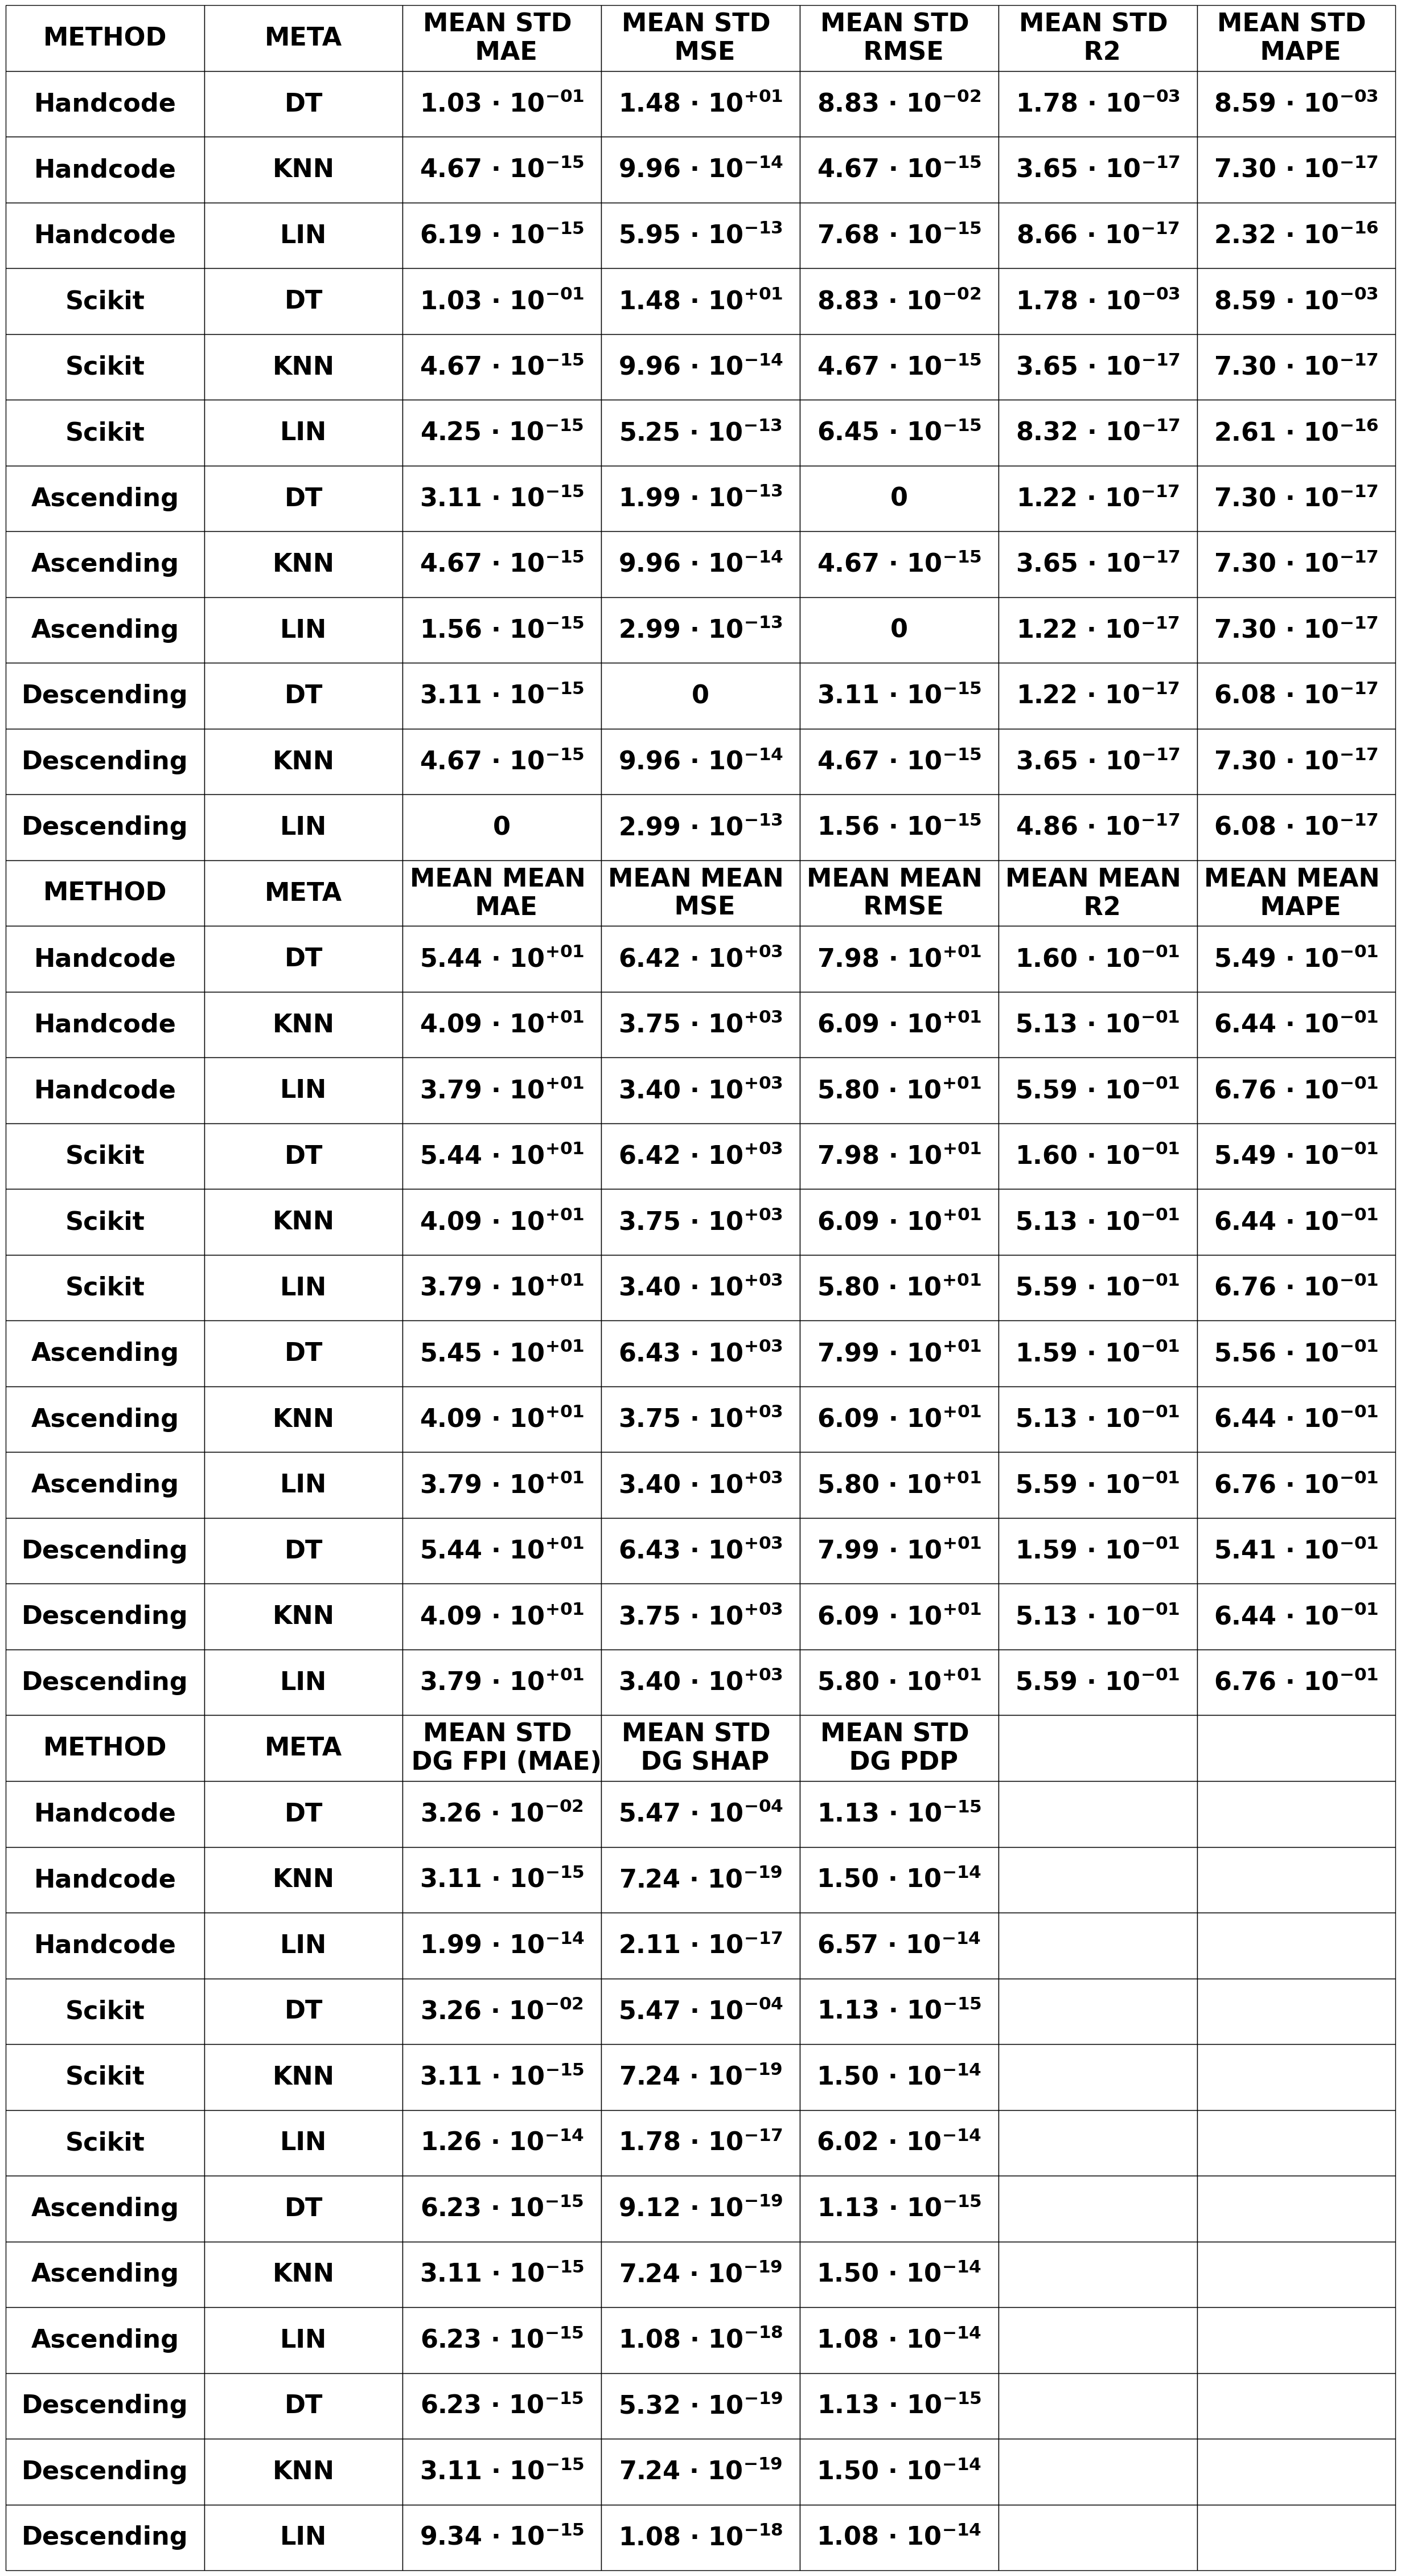

In [9]:
fig_table = plt.figure(figsize=(25,25))
ax_table = plt.subplot2grid((1,1),(0,0),fig=fig_table)

table_mean_dataframe = normal_prediction_mean_dataframe.copy()
table_std_dataframe = normal_prediction_std_dataframe.copy()
table_feature_importance_dataframe = feature_importance_dataframe.copy()

table_list = [table_std_dataframe,table_mean_dataframe,table_feature_importance_dataframe]

# change format
for table_dataframe in table_list:
    for column in table_dataframe.columns:
        if column not in ['METHOD','META','Holder0','Holder1']: 
            table_dataframe[column] = table_dataframe[column].map(lambda x: f'{float(x):.2e}'.split('e')[0] + u' \xb7 ' + '10' + f"$^{{{f'{float(x):.2e}'.split('e')[1]}}}$" if x != 0 else 0)

# combine 2 tables
combined_table_values = []
for table_dataframe in table_list:
    for row_count,row in enumerate(table_dataframe.values):
        # if it is the first row, append the columns
        if row_count == 0:
            added_column_list = []
            for values in table_dataframe.columns:
                if 'MEAN MEAN' in values:
                    added_column = 'MEAN MEAN'+' \n'+values.split('MEAN MEAN')[1]
                    added_column_list.append(added_column)
                elif 'MEAN STD' in values:
                    added_column = 'MEAN STD'+' \n'+values.split('MEAN STD')[1]
                    added_column_list.append(added_column)
                else:
                    added_column_list.append(values)
            added_column_list = np.asarray(added_column_list)
            combined_table_values.append(added_column_list)
        combined_table_values.append(row)
combined_table_values = np.asarray(combined_table_values)

# use first row as column, rest as values
combined_table_dataframe = pd.DataFrame(data=combined_table_values[1:,0:],columns=combined_table_values[0,0:]).map(lambda x: x if x not in ['Holder0','Holder1'] else '')
combined_table_dataframe.to_csv('Final results.csv')

# draw table
the_table = ax_table.table(cellText=combined_table_dataframe.values,colLabels=combined_table_dataframe.columns,cellLoc='center',loc='center') # center allows plotting in middle

# set table parameters
cell_dict = the_table.get_celld()
for row,col in cell_dict:
    cell_dict[(row,col)].set_height(0.03)
    cell_dict[(row,col)].set_width(0.09)
    # cell_dict[(row,col)].get_text().set_rotation(45)
the_table.auto_set_font_size(False)
the_table.set_fontsize(32)
the_table.scale(2,2)

# figure parameters
ax_table.axis('off')
ax_table.axis('tight')
fig_table.patch.set_visible(False)
fig_table.tight_layout()
plt.show()